In [16]:
"""Importing modules"""
import numpy as np                                   #Module NumPy
import pandas as pd                                  #Module Pandas
import matplotlib.pyplot as plt                      #Module Plot
from sklearn.decomposition import PCA                #Module PCA
from sklearn.preprocessing import StandardScaler     #Module Normalise 
from sklearn.model_selection import train_test_split #Module Split Dataset 
from sklearn.svm import SVC                          #Module Support Vector Classifier
from sklearn.metrics import classification_report    #Module Classification Report

"""Import datasets"""
trnDataset = pd.read_csv('trndata.csv')              #Importing training dataset
tstDataset = pd.read_csv('tstdata.csv')              #Importing testing dataset

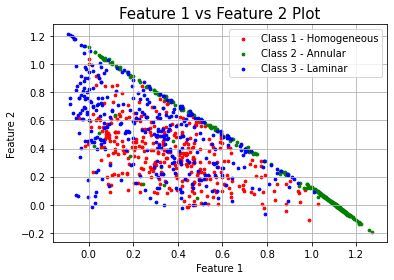

In [17]:
"""Scatter plot"""
#Plot labels
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#Plot title
plt.title('Feature 1 vs Feature 2 Plot', fontsize=15)
#Plot legends list
legend = ['Class 1 - Homogeneous', 'Class 2 - Annular', 'Class 3 - Laminar']

#Lists used by for loop
targets = [1,2,3]
colors = ['r','g','b']
for target, color in zip(targets, colors):
    #For loop to iterate through all training dataset and present in a plot, setting each class with its colour
    indicesToKeep = trnDataset['L'] == target
    plt.scatter(trnDataset.loc[indicesToKeep, 'F1'], trnDataset.loc[indicesToKeep,'F2'], c = color, s = 7.5)

#Setup plot with legends
plt.legend(legend)    
plt.grid()

In [18]:
"""Normalise datasets"""

#List holding columns labels
features = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12']

#Separate data values from their targets and store both separately 
trnValues = trnDataset.iloc[:, :12]
trnTargets = trnDataset.iloc[:,12]
tstValues = tstDataset.iloc[:, :12]
tstTargets = tstDataset.iloc[:,12]
#Normalise data values
scaler = StandardScaler().fit(trnValues)
scaled_trnValues = scaler.transform(trnValues)
scaled_tstValues = scaler.transform(tstValues)

"""Principal Component Analysis"""
pca = PCA()
pca.fit(scaled_trnValues)
#Obtain projected training values
proj_trn = pca.transform(scaled_trnValues)

#Setup dataframe to hold projected training values and their targets
df_trn = pd.DataFrame(data = proj_trn, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
final_trn = pd.concat([df_trn, trnTargets], axis = 1)

Variances for each principal component: [43.9 19.7 15.5  6.7  6.2  2.8  1.7  1.3  1.   0.8  0.3  0.1]


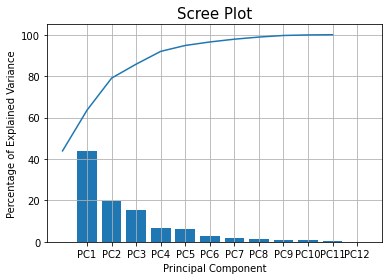

In [19]:
"""Variance"""
#Calculate percente of explanined variance
variance = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
cum_variance = np.cumsum((pca.explained_variance_ratio_)*100)
#List holding bars' labels
labels = ['PC' + str(x) for x in range(1,len(variance)+1)]

#Create plot with explained and accumulated variance percentage
plt.plot(cum_variance)
plt.bar(x=range(1,len(variance)+1), height = variance, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot', fontsize=15)
plt.grid()
print("Variances for each principal component:", variance)

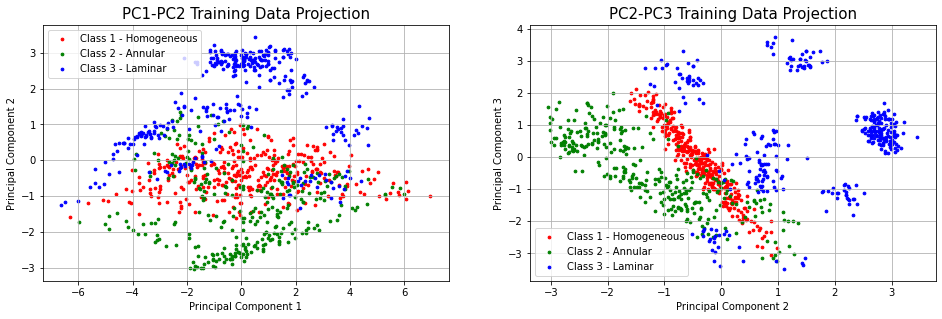

In [20]:
"""Projections for training data figure (PC1-PC2, PC2-PC3) """
#Create figure of size 16 by 16
fig1 = plt.figure(figsize = (16,16))
legend = ['Class 1 - Homogeneous', 'Class 2 - Annular', 'Class 3 - Laminar']

#Add first subplot and its details
ax1 = fig1.add_subplot(3,2,1)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('PC1-PC2 Training Data Projection', fontsize=15)

#Add second subplot and its details
ax2 = fig1.add_subplot(3,2,2)
ax2.set_xlabel('Principal Component 2')
ax2.set_ylabel('Principal Component 3')
ax2.set_title('PC2-PC3 Training Data Projection', fontsize=15)

#Lists used by for loop
targets = [1,2,3]
colors = ['r','g','b']

for target, color, in zip(targets, colors):
    #For loop to setup the plot according to PC1 and PC2, setting each class with its colour
    indicesToKeep = final_trn['L'] == target
    ax1.scatter(final_trn.loc[indicesToKeep, 'PC1'], final_trn.loc[indicesToKeep, 'PC2'], c = color, s = 7.5)

for target, color, in zip(targets, colors):
    #For loop to setup the plot according to PC2 and PC3, setting each class with its colour
    indicesToKeep = final_trn['L'] == target
    ax2.scatter(final_trn.loc[indicesToKeep, 'PC2'], final_trn.loc[indicesToKeep, 'PC3'], c = color, s = 7.5)
    
#Setup both subplots    
ax1.legend(legend)
ax2.legend(legend)
ax1.grid()
ax2.grid()

In [21]:
"Testing Data Projection"

#Project testing values according to previous created PCA
proj_tst = pca.transform(scaled_tstValues)

#Setup dataframe to hold projected testing values and their targets
df_tst = pd.DataFrame(data = proj_tst, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
final_tst = pd.concat([df_tst, tstTargets], axis = 1)

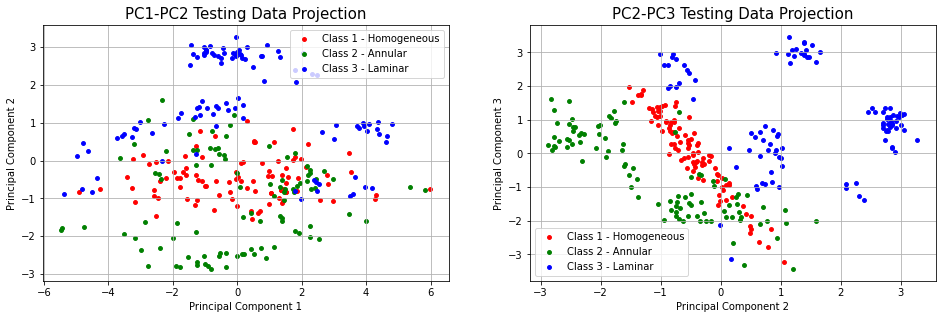

In [22]:
"""Projections for test data figure (PC1-PC2, PC2-PC3) """
#Create figure of size 16 by 16
fig1 = plt.figure(figsize = (16,16))
legend = ['Class 1 - Homogeneous', 'Class 2 - Annular', 'Class 3 - Laminar']

#Add first subplot and its details
ax1 = fig1.add_subplot(3,2,1)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('PC1-PC2 Testing Data Projection', fontsize=15)

#Add second subplot and its details
ax2 = fig1.add_subplot(3,2,2)
ax2.set_xlabel('Principal Component 2')
ax2.set_ylabel('Principal Component 3')
ax2.set_title('PC2-PC3 Testing Data Projection', fontsize=15)

#Lists used by for loop
targets = [1,2,3]
colors = ['r','g','b']

for target, color, in zip(targets, colors):
    #For loop to setup the plot according to PC1 and PC2, setting each class with its colour
    indicesToKeep = final_tst['L'] == target
    ax1.scatter(final_tst.loc[indicesToKeep, 'PC1'], final_tst.loc[indicesToKeep, 'PC2'], c = color, s = 15)

for target, color, in zip(targets, colors):
    #For loop to setup the plot according to PC2 and PC3, setting each class with its colour
    indicesToKeep = final_tst['L'] == target
    ax2.scatter(final_tst.loc[indicesToKeep, 'PC2'], final_tst.loc[indicesToKeep, 'PC3'], c = color, s = 15)
    
#Setup both subplots    
ax1.legend(legend)
ax2.legend(legend)
ax1.grid()
ax2.grid()

In [23]:
"""Split training dataset into two subsets"""
#Training dataset is split into: small training set (sTrn) and small validation set (sVal), their targets are held separetely
sTrn, sVal, sTrn_Targets, sVal_Targets = train_test_split( trnValues, trnTargets, test_size=0.25, random_state=0)

#Confirmation print statements to show size of each variable
print("Whole set size:", trnValues.shape)
print("Training subset size:", sTrn.shape)
print("Training targets subset size:", sTrn_Targets.shape)
print("Validation subset size:", sVal.shape)
print("Validation targets subset size:", sVal_Targets.shape)

Whole set size: (1000, 12)
Training subset size: (750, 12)
Training targets subset size: (750,)
Validation subset size: (250, 12)
Validation targets subset size: (250,)


In [24]:
"""Normalize data"""
#Normalise data values
scalerS = StandardScaler().fit(sTrn)
scaled_sTrn = scaler.transform(sTrn)
scaled_sVal = scaler.transform(sVal)

In [25]:
"""SVC model [C=50,γ=10]"""
#Create and train an SVC model
svc1 = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=10)
model1 = svc1.fit(scaled_sTrn, sTrn_Targets)
#Obtain predictions on validation set
pred1 = model1.predict(scaled_sVal)
print("SVC model 1 [C=50,γ=10]")
#Report details on prediction
print(classification_report(sVal_Targets, pred1))
print()
print()
print()
print()

#Create and train an SVC model
"""SVC model [C=50,γ=20]"""
svc2 = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=20)
model2 = svc2.fit(scaled_sTrn, sTrn_Targets)
#Obtain predictions on validation set
pred2 = model2.predict(scaled_sVal)
print("SVC model 2 [C=50,γ=20]")
#Report details on prediction
print(classification_report(sVal_Targets, pred2))
print()
print()
print()
print()

#Create and train an SVC model
"""SVC model [C=100,γ=10]"""
svc3 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=10)
model3 = svc3.fit(scaled_sTrn, sTrn_Targets)
#Obtain predictions on validation set
pred3 = model3.predict(scaled_sVal)
print("SVC model 3 [C=100,γ=10]")
#Report details on prediction
print(classification_report(sVal_Targets, pred3))
print()
print()
print()
print()

#Create and train an SVC model
"""SVC model [C=100,γ=20]"""
svc4 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=20)
model4 = svc4.fit(scaled_sTrn, sTrn_Targets)
#Obtain predictions on validation set
pred4 = model4.predict(scaled_sVal)
print("SVC model 4 [C=100,γ=20]")
#Report details on prediction
print(classification_report(sVal_Targets, pred4))

SVC model 1 [C=50,γ=10]
              precision    recall  f1-score   support

           1       0.62      1.00      0.77        80
           2       1.00      0.79      0.89        68
           3       1.00      0.66      0.79       102

    accuracy                           0.80       250
   macro avg       0.87      0.82      0.81       250
weighted avg       0.88      0.80      0.81       250





SVC model 2 [C=50,γ=20]
              precision    recall  f1-score   support

           1       0.39      1.00      0.56        80
           2       1.00      0.22      0.36        68
           3       1.00      0.27      0.43       102

    accuracy                           0.49       250
   macro avg       0.80      0.50      0.45       250
weighted avg       0.80      0.49      0.45       250





SVC model 3 [C=100,γ=10]
              precision    recall  f1-score   support

           1       0.62      1.00      0.77        80
           2       1.00      0.79      0.89     

In [26]:
"""SVC model with both whole datasets (training dataset and tested on testing dataset) [C=100,γ=10]"""

#Create and train an SVC model
svc5 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=10)
model5 = svc5.fit(scaled_trnValues, trnTargets)
#Obtain predictions on testing set
pred5 = model5.predict(scaled_tstValues)
print("SVC model 5 - Both whole datasets [C=100,γ=10]")
#Report details on prediction
print(classification_report(tstTargets, pred5))

SVC model 5 - Both whole datasets [C=100,γ=10]
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        98
           2       1.00      0.81      0.89        98
           3       1.00      0.80      0.89       104

    accuracy                           0.87       300
   macro avg       0.90      0.87      0.87       300
weighted avg       0.91      0.87      0.87       300



In [27]:
"""Principal Component Analysis - Feature reduction"""

#Create PCA analysis model with 6 principal components
adv_pca = PCA(6)
#Obtain projected training and testing values from Task 1 normalised data
adv_proj_trn = adv_pca.fit_transform(scaled_trnValues)
adv_proj_tst = adv_pca.transform(scaled_tstValues)

#Normalise data values
adv_scaler = StandardScaler().fit(adv_proj_trn)
adv_scaled_trnValues = adv_scaler.transform(adv_proj_trn)
adv_scaled_tstValues = adv_scaler.transform(adv_proj_tst)

In [28]:
"""Feature reduction by slicing - Alternative"""
#Store first 6 principal components in variables
alt_proj_trn = proj_trn[:, :6]
alt_proj_tst = proj_tst[:, :6] 

#Normalise data values
alt_scaler = StandardScaler().fit(alt_proj_trn)
alt_scaled_trnValues = adv_scaler.transform(alt_proj_trn)
alt_scaled_tstValues = adv_scaler.transform(alt_proj_tst)

In [29]:
"""SVC model with the feature reduction dataset [C=100,γ=10]"""

#Create and train an SVC model
svc6 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=10)
model6 = svc6.fit(adv_scaled_trnValues, trnTargets)
#Obtain predictions on testing set
pred6 = model6.predict(adv_scaled_tstValues)
print("SVC model 6 - Feature reduction datasets [C=100,γ=10]")
#Report details on prediction
print(classification_report(tstTargets, pred6))

SVC model 6 - Feature reduction datasets [C=100,γ=10]
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        98
           2       0.90      1.00      0.95        98
           3       1.00      0.92      0.96       104

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.96      0.96       300



In [30]:
"""SVC model with the feature reduction dataset [C=100,γ=10] - Alternative"""

#Create and train an SVC model
svc7 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=10)
model7 = svc7.fit(alt_scaled_trnValues, trnTargets)
#Obtain predictions on testing set
pred7 = model7.predict(alt_scaled_tstValues)
print("SVC model 7 - Feature reduction datasets [C=100,γ=10] - Alternative")
#Report details on prediction
print(classification_report(tstTargets, pred7))

SVC model 7 - Feature reduction datasets [C=100,γ=10] - Alternative
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        98
           2       0.90      1.00      0.95        98
           3       1.00      0.92      0.96       104

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.96      0.96       300

